In [135]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [136]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [137]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"],inplace=True)

In [138]:
# Determine the number of unique values in each column.
all_col = application_df.nunique()
more_than_ten = all_col[all_col.values > 10].index
more_than_ten

Index(['APPLICATION_TYPE', 'CLASSIFICATION', 'ASK_AMT'], dtype='object')

In [139]:
# optimization 1: changing the binning for both 'APPLICATION_TYPE'
# and 'CLASSIFICATION' to 200

In [140]:
def bin_col(df,col_name,limit):
    count = df[col_name].value_counts()
    replace = list(count[count < limit].index)
    for app in replace:
        df[col_name] = df[col_name].replace(app,"Other")
    return df

In [141]:
application_df = bin_col(application_df,'APPLICATION_TYPE',200)
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [142]:
application_df = bin_col(application_df,'CLASSIFICATION',200)
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [143]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [ ]:
# Optimization 2: change ASK_AMT to LOG(ASK_AMT)

In [147]:
import numpoy as np
application_df["LOG_ASK_AMT"] = np.log10(application_df['ASK_AMT'])

In [148]:
application_df.drop(columns=["ASK_AMT"],inplace=True)

In [149]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [ ]:
# optimization 3: change drop STATUS since there are only 5 values that are not 1

In [150]:
application_df.drop(columns=["STATUS"],inplace=True)

In [151]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL',
       'LOG_ASK_AMT'],
      dtype='object')

In [152]:
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Create a OneHotEncoder instanc
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)

C:\Users\afrap\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\afrap\AppData\Local\Temp\ipykernel_16084\3169484359.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(cat,1)


In [153]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [154]:
# Create a StandardScaler instances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [175]:
# optimization 4: increasing number of hidden layers
# optimization 5: increase the number of neurons in each later
# optimization 5: increase epoth to 500
# optimization 6: use sigmoid activation function

In [157]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 160
hidden_nodes_layer3 = 160
hidden_nodes_layer4 = 160

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# forth hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_new = nn_new.fit(X_train_scaled,y_train,epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5796 - accuracy: 0.7131
Epoch 2/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5605 - accuracy: 0.7266
Epoch 3/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7282
Epoch 4/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7271
Epoch 5/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7269
Epoch 6/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7282
Epoch 7/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7275
Epoch 8/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7292
Epoch 9/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7297
Epoch 10/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5246 - accuracy: 0.7414
Epoch 82/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5242 - accuracy: 0.7436
Epoch 83/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5240 - accuracy: 0.7420
Epoch 84/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.7416
Epoch 85/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5234 - accuracy: 0.7430
Epoch 86/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5241 - accuracy: 0.7435
Epoch 87/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5236 - accuracy: 0.7422
Epoch 88/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.7422
Epoch 89/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5231 - accuracy: 0.7432
Epoch 90/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5228 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5139 - accuracy: 0.7487
Epoch 161/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5147 - accuracy: 0.7468
Epoch 162/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7484
Epoch 163/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5137 - accuracy: 0.7484
Epoch 164/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5130 - accuracy: 0.7487
Epoch 165/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7491
Epoch 166/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5131 - accuracy: 0.7476
Epoch 167/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5144 - accuracy: 0.7483
Epoch 168/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7484
Epoch 169/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5136 - a

804/804 [==============================] - 1s 1ms/step - loss: 0.5098 - accuracy: 0.7495
Epoch 240/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5089 - accuracy: 0.7502
Epoch 241/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5096 - accuracy: 0.7496
Epoch 242/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5089 - accuracy: 0.7511
Epoch 243/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7499
Epoch 244/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.7499
Epoch 245/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.7499
Epoch 246/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7506
Epoch 247/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5097 - accuracy: 0.7495
Epoch 248/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5090 - a

804/804 [==============================] - 1s 1ms/step - loss: 0.5079 - accuracy: 0.7513
Epoch 319/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5068 - accuracy: 0.7519
Epoch 320/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5067 - accuracy: 0.7505
Epoch 321/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5054 - accuracy: 0.7520
Epoch 322/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7522
Epoch 323/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5068 - accuracy: 0.7517
Epoch 324/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.7505
Epoch 325/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7520
Epoch 326/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5066 - accuracy: 0.7519
Epoch 327/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5059 - a

804/804 [==============================] - 1s 1ms/step - loss: 0.5050 - accuracy: 0.7522
Epoch 398/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5052 - accuracy: 0.7520
Epoch 399/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5050 - accuracy: 0.7519
Epoch 400/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5042 - accuracy: 0.7531
Epoch 401/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.7522
Epoch 402/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5046 - accuracy: 0.7512
Epoch 403/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5043 - accuracy: 0.7529
Epoch 404/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.7527
Epoch 405/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5048 - accuracy: 0.7528
Epoch 406/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5041 - a

804/804 [==============================] - 1s 1ms/step - loss: 0.5023 - accuracy: 0.7542
Epoch 477/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5036 - accuracy: 0.7544
Epoch 478/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5027 - accuracy: 0.7539
Epoch 479/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5030 - accuracy: 0.7532
Epoch 480/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5038 - accuracy: 0.7530
Epoch 481/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5034 - accuracy: 0.7539
Epoch 482/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.7521
Epoch 483/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5016 - accuracy: 0.7540
Epoch 484/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5022 - accuracy: 0.7537
Epoch 485/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5040 - a

In [174]:
nn_new.save("AlphabetSoupCharity_Optimization.h5")

Text(0, 0.5, 'accuracy')

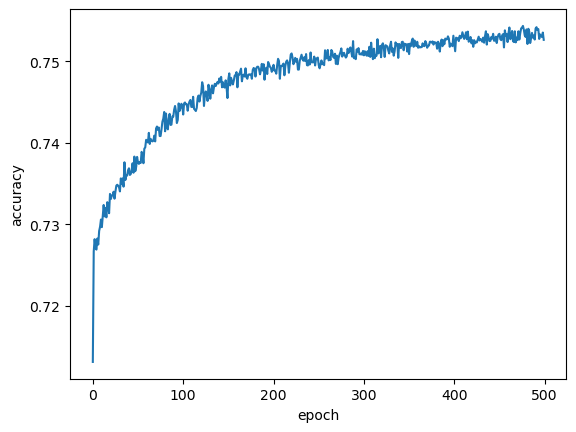

In [172]:
import matplotlib.pyplot as plt
plt.plot(fit_model_new.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

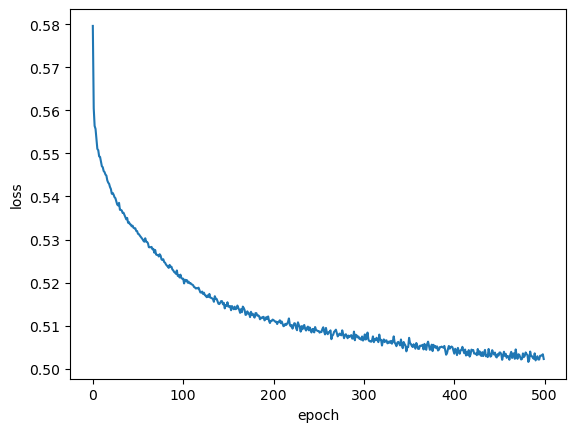

In [173]:
plt.plot(fit_model_new.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")